In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/homeprices_banglore.csv')
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
data.shape

(20, 3)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sx=MinMaxScaler()
sy=MinMaxScaler()

In [7]:
X=sx.fit_transform(data.drop('price', axis='columns'))
y=sy.fit_transform(data.price.values.reshape(data.shape[0],1))

In [8]:
X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [25]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features=X.shape[1]
  w=np.ones(shape=(number_of_features))
  b=0
  total_samples=X.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    y_predicted=np.dot(w, X.T)+b
    w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad
    cost= np.mean(np.square(y_true-y_predicted))
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list=batch_gradient_descent(X, y.reshape(y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'cost')

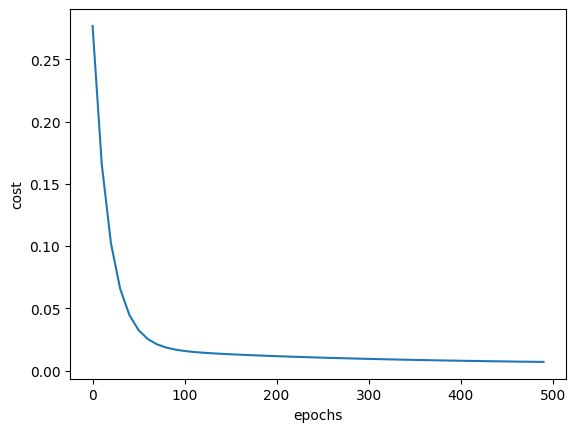

In [26]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epochs')
plt.ylabel('cost')

In [27]:
def predict_price(area, bedrooms, w,b):
  X_scale=sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0]*X_scale[0] + w[1]*X_scale[1] + b
  price=sy.inverse_transform([[scaled_price]])[0][0]
  return price

In [28]:
predict_price(2600, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [31]:
import random
random.randint(0,6)

6

In [40]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features=X.shape[1]
  w=np.ones(shape=(number_of_features))
  b=0
  total_samples=X.shape[0]
  cost_list=[]
  epoch_list=[]

  for i in range(epochs):
    random_index=random.randint(0, total_samples-1)
    sample_X=X[random_index]
    sample_y=y_true[random_index]
    y_predicted=np.dot(w, sample_X.T)+b

    w_grad=-(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
    b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad
    cost= np.mean(np.square(sample_y-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd=stochastic_gradient_descent(X, y.reshape(y.shape[0],),1000)
w_sgd, b_sgd, cost_sgd

(array([0.86965035, 0.84096673]), -0.25416755106810796, 0.05710606820885084)

Text(0, 0.5, 'cost')

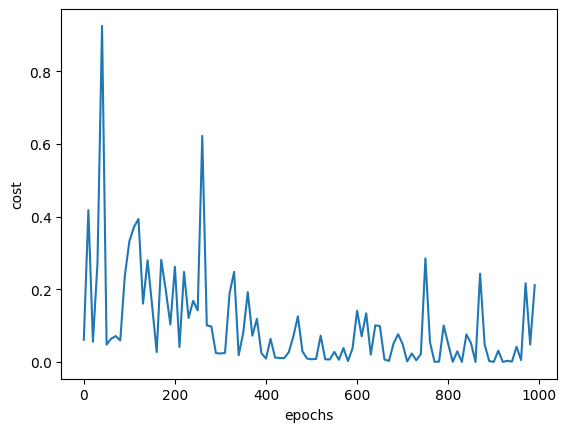

In [41]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('epochs')
plt.ylabel('cost')

In [43]:
predict_price(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


155.7059638628857

In [56]:
def mini_gradient_descent(X, y_true, epochs, batch_size=5, learning_rate=0.01):

  number_of_features=X.shape[1]
  w=np.ones(shape=(number_of_features))
  b=0
  total_samples=X.shape[0]

  if batch_size>total_samples:
    batch_size=total_samples

  cost_list=[]
  epoch_list=[]
  num_batches=int(total_samples/batch_size)

  for i in range(epochs):
    random_indices=np.random.permutation(total_samples)
    X_tmp=X[random_indices]
    y_tmp=y_true[random_indices]

    for j in range(0,total_samples,batch_size):
      Xj = X_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]
      y_predicted = np.dot(w, Xj.T) + b
      w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
      b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad
      cost = np.mean(np.square(yj-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd=mini_gradient_descent(X, y.reshape(y.shape[0],),500, batch_size=5)
w_mgd, b_mgd, cost_mgd

(array([0.67115516, 0.53357563]), -0.14373534554837702, 0.005131450968203475)

Text(0, 0.5, 'cost')

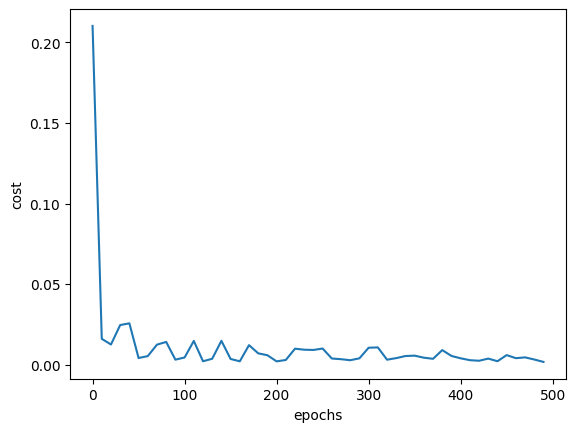

In [58]:
plt.plot(epoch_list_mgd, cost_list_mgd)
plt.xlabel('epochs')
plt.ylabel('cost')